<a href="https://colab.research.google.com/github/OmGhag/DWM_colab/blob/main/Exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
df = pd.read_csv('/income.csv')

In [16]:
df.shape

(22, 3)

In [17]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [19]:
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [25]:
X1=df[['Age','Income($)']].iloc[:,:].values
inertia=[]
for n in range(1,20):
  algorithm=(KMeans(n_clusters=n, init='k-means++', n_init='auto', max_iter=300,
                    tol=0.0001, verbose=0, random_state=111, algorithm='lloyd'))
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)

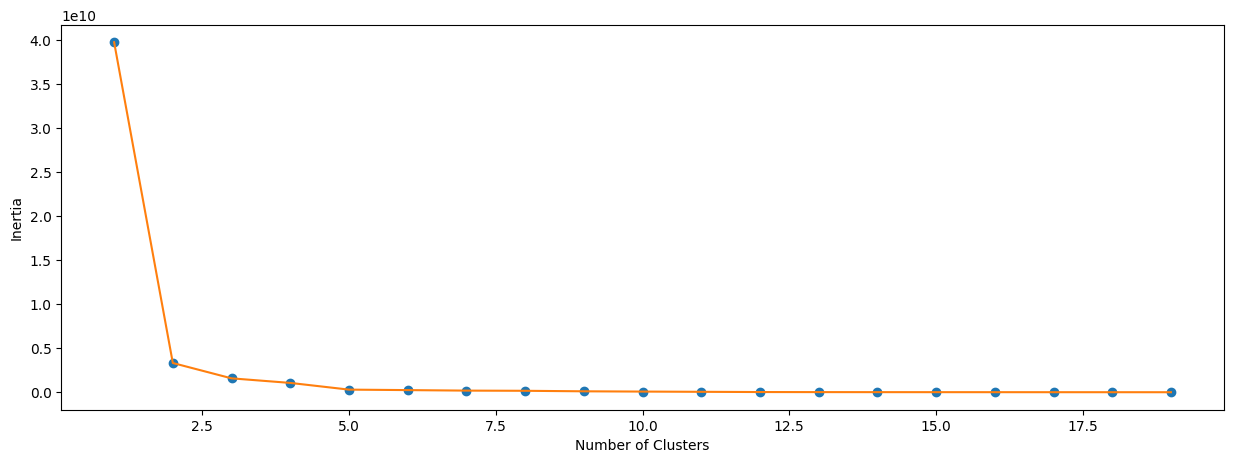

In [28]:
plt.figure(1, figsize=(15,5))
plt.plot(np.arange(1,20), inertia,'o')
plt.plot(np.arange(1,20), inertia,'-', alpha=1)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [30]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [31]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [32]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.32000000e+01, 6.26333333e+04]])

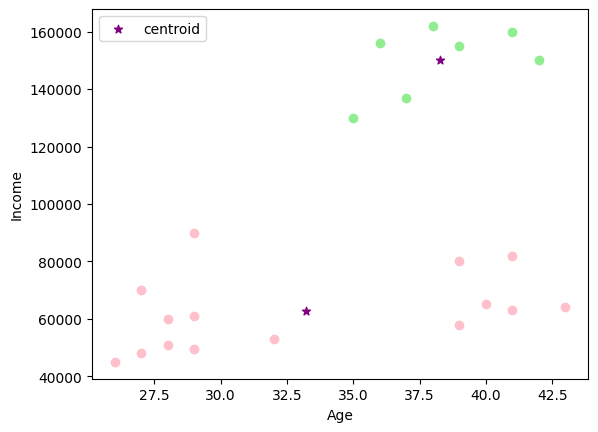

In [33]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1['Age'],df1['Income($)'],color='lightgreen')
plt.scatter(df2['Age'],df2['Income($)'],color='pink')
plt.scatter(df3['Age'],df3['Income($)'],color='skyblue')
plt.scatter(df4['Age'],df4['Income($)'],color='yellow')
plt.scatter(df5['Age'],df5['Income($)'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [34]:
num_clusters = km.cluster_centers_.shape[0]

centroids_diff = np.zeros((num_clusters, num_clusters))

for i in range (num_clusters):
  for j in range(i+1, num_clusters):
    diff = km.cluster_centers_[i] - km.cluster_centers_[j]
    distance = np.sqrt(np.sum(diff**2))
    centroids_diff[i,j]=distance
    centroids_diff[j,i]=distance

print("Differences between centroids:")
print(centroids_diff)

Differences between centroids:
[[    0.         87366.66681469]
 [87366.66681469     0.        ]]
